# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [2]:
# Load pickled data
import pickle
import numpy as np

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [3]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.bincount(y_test).nonzero()[0].size

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

Examples of signs:


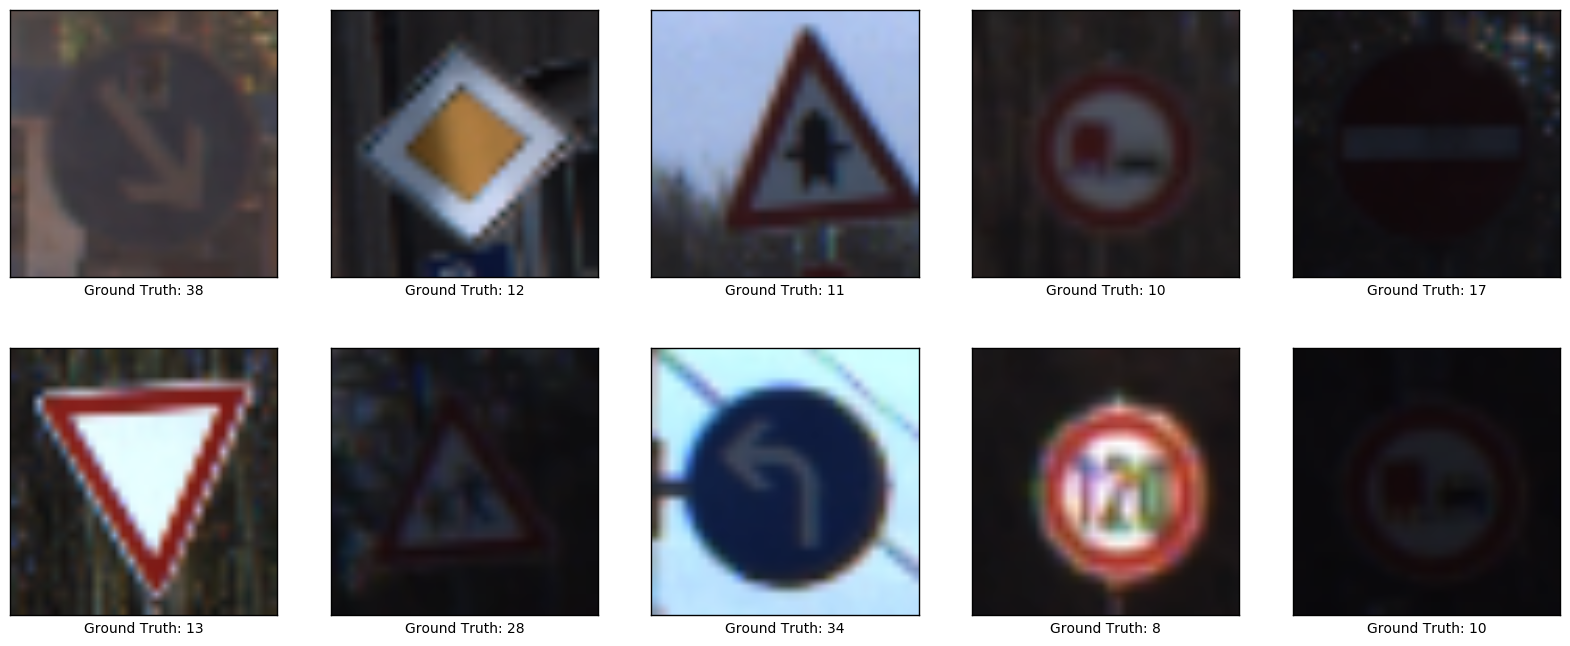

Count by classes:


array([[   0,  210],
       [   1, 2220],
       [   2, 2250],
       [   3, 1410],
       [   4, 1980],
       [   5, 1860],
       [   6,  420],
       [   7, 1440],
       [   8, 1410],
       [   9, 1470],
       [  10, 2010],
       [  11, 1320],
       [  12, 2100],
       [  13, 2160],
       [  14,  780],
       [  15,  630],
       [  16,  420],
       [  17, 1110],
       [  18, 1200],
       [  19,  210],
       [  20,  360],
       [  21,  330],
       [  22,  390],
       [  23,  510],
       [  24,  270],
       [  25, 1500],
       [  26,  600],
       [  27,  240],
       [  28,  540],
       [  29,  270],
       [  30,  450],
       [  31,  780],
       [  32,  240],
       [  33,  689],
       [  34,  420],
       [  35, 1200],
       [  36,  390],
       [  37,  210],
       [  38, 2070],
       [  39,  300],
       [  40,  360],
       [  41,  240],
       [  42,  240]])

In [16]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

print("Examples of signs:")
fig = plt.figure(figsize=(20, 8))

image_seq = np.random.randint(1,len(X_train),10)

for ind,val in enumerate(image_seq):
    img = fig.add_subplot(2,5,ind+1)
    plt.imshow(X_train[val-1])
    #Add corresponding label
    img.set_xlabel("Ground Truth: {0}".format(y_train[val-1]))
    #Remove the axis ticks
    img.set_xticks([])
    img.set_yticks([])

plt.show()

cnt = np.bincount(y_train)
ii = np.nonzero(cnt)[0]
print("Count by classes:")
np.vstack((ii,cnt[ii])).T

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [23]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
def preprocesing(dataset):
    # Convert to grayscale
    dataset = np.mean(dataset, axis=3,dtype=int)
    dataset.resize([dataset.shape[0],dataset.shape[1],dataset.shape[2], 1])

    # Normalization
    dataset = dataset/255.
    return dataset

X_train = preprocesing(X_train)
X_test = preprocesing(X_test)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_


**Answer:**
I tried different approaches: RGB model (https://arxiv.org/pdf/1606.02228v2.pdf), YUV model (http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf), but found that the simplest is the best. My preprocessing:
1. Grayscaling
2. Normalization

First of all, I think that colors for signs recognition are not matter. More important are the shape and context.

Second, using contrast normalisation slightly improve the result but requires additional library (OpenCV) and additional time to processing.


In [25]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

# Hyperparameters
EPOCHS = 10
BATCH_SIZE = 100
rate = 0.01
std = 0.1
train_limit = int(n_train*.8)

import math
def split2batches(batch_size, features, labels):
    assert len(features) == len(labels)
    outout_batches = []

    sample_size = len(features)
    for start_i in range(0, sample_size, batch_size):
        end_i = start_i + batch_size

        batch = [features[start_i:end_i], labels[start_i:end_i]]
        outout_batches.append(batch)

    return outout_batches

def array2classifier(M, array):
    N = len(array)
    resultArray = np.zeros((N, M), float)
    resultArray[np.arange(N), array] = 1.
    return resultArray

def shuffle(features, labels):
    perm = np.random.permutation(labels.shape[0])
    shuffled_features = features[perm,:,:,:]
    shuffled_labels = labels[perm]
    return shuffled_features, shuffled_labels


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**
I split train data into a train (80%) and validation (20%) datasets (different data for each epoch). And I don't use test dataset for training, only for final test. 

In [59]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
from tensorflow.contrib.layers import flatten
def LeNet(x):
    global std

    # 28x28x6
    x = tf.reshape(x, (-1, 32, 32, 1))
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), stddev=std))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    conv1 = tf.nn.relu(conv1)

    # 14x14x6
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # 10x10x16
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), stddev=std))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

    conv2 = tf.nn.relu(conv2)

    # 5x5x16
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten
    fc1 = flatten(conv2)
    # (5 * 5 * 16, 120)
    fc1_shape = (fc1.get_shape().as_list()[-1], 120)

    fc1_W = tf.Variable(tf.truncated_normal(shape=(fc1_shape), stddev=std))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1 = tf.matmul(fc1, fc1_W) + fc1_b
    fc1 = tf.nn.relu(fc1)

    fc2_W = tf.Variable(tf.truncated_normal(shape=(120, n_classes), stddev=std))
    fc2_b = tf.Variable(tf.zeros(n_classes))
    return tf.matmul(fc1, fc2_W) + fc2_b


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
As the most of the students, I take LeNet architecture:
1. Convolution layer: 28x28x6
2. Max pooling: 14x14x6
3. Convolution layer: 10x10x16
4. Max pooling: 5x5x16
5. Flatten: 120
6. Flatten: 43

In [60]:
### Train your model here.
### Feel free to use as many code cells as needed.
x = tf.placeholder(tf.float32, (None, image_shape[0], image_shape[1], 1))
y = tf.placeholder(tf.float32, (None, n_classes))
learning_rate = tf.placeholder(tf.float32, shape=[])
fc2 = LeNet(x)

loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(fc2, y))
correct_prediction = tf.equal(tf.argmax(fc2, 1), tf.argmax(y, 1))
accuracy_op = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
opt = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = opt.minimize(loss_op)

def eval_data(X_test, y_test):
    steps_per_epoch = len(X_test) // BATCH_SIZE
    num_examples = steps_per_epoch * BATCH_SIZE
    total_acc, total_loss = 0, 0
    batches = split2batches(BATCH_SIZE, X_test, y_test)

    for step in range(steps_per_epoch):
        batch = batches[step]
        batch_x = batch[0]
        batch_y = array2classifier(n_classes, batch[1])
        loss, acc = sess.run([loss_op, accuracy_op], feed_dict={x: batch_x, y: batch_y})
        total_acc += (acc * batch_x.shape[0])
        total_loss += (loss * batch_x.shape[0])
    return total_loss/num_examples, total_acc/num_examples

init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

if __name__ == '__main__':
        steps_per_epoch = train_limit // BATCH_SIZE
        num_examples = steps_per_epoch * BATCH_SIZE

        # Train model
        for i in range(EPOCHS):
            X_train, y_train = shuffle(X_train, y_train)
            batches = split2batches(BATCH_SIZE, X_train[:train_limit], y_train[:train_limit])

            for step in range(steps_per_epoch):
                batch = batches[step]
                batch_x = batch[0]
                batch_y = array2classifier(n_classes, batch[1])

                loss = sess.run(train_op, feed_dict={x: batch_x, y: batch_y, learning_rate: rate})

            val_loss, val_acc = eval_data(X_train[train_limit:], y_train[train_limit:])
            print("EPOCH {} ...".format(i+1))
            print("Validation loss = {:.3f}".format(val_loss))
            print("Validation accuracy = {:.3f}".format(val_acc))

            print("rate", rate)
            rate = max(rate*0.5, 0.00001)

            print()

        # Evaluate on the test data
        test_loss, test_acc = eval_data(X_test, y_test)
        print("Test loss = {:.3f}".format(test_loss))
        print("Test accuracy = {:.3f}".format(test_acc))

EPOCH 1 ...
Validation loss = 0.353
Validation accuracy = 0.910
rate 0.01

EPOCH 2 ...
Validation loss = 0.156
Validation accuracy = 0.958
rate 0.005

EPOCH 3 ...
Validation loss = 0.108
Validation accuracy = 0.972
rate 0.0025

EPOCH 4 ...
Validation loss = 0.066
Validation accuracy = 0.983
rate 0.00125

EPOCH 5 ...
Validation loss = 0.057
Validation accuracy = 0.986
rate 0.000625

EPOCH 6 ...
Validation loss = 0.059
Validation accuracy = 0.985
rate 0.0003125

EPOCH 7 ...
Validation loss = 0.052
Validation accuracy = 0.988
rate 0.00015625

EPOCH 8 ...
Validation loss = 0.044
Validation accuracy = 0.989
rate 7.8125e-05

EPOCH 9 ...
Validation loss = 0.049
Validation accuracy = 0.990
rate 3.90625e-05

EPOCH 10 ...
Validation loss = 0.045
Validation accuracy = 0.990
rate 1.953125e-05

Test loss = 0.530
Test accuracy = 0.905


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**<br />
EPOCHS = 10<br />
BATCH_SIZE = 100<br />
I also set stddev in truncated_normal to 0.1<br />
Started rate = 0.01. Then I decayed it for each ephoch: rate = max(rate*0.5, 0.00001)<br />
Optimizer: AdamOptimizer<br/><br/>

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**<br/>
I took known leNet architecture and tried different pre-processing actions. Surprisingly I get an appropriate result with basic grayscale and normalise processes. <br/>
Then I defined learning rate value and decay algorythm for the better result. Accoring to the forum the accuracy 0.9 for ten epochs and without using test dataset is well. 

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

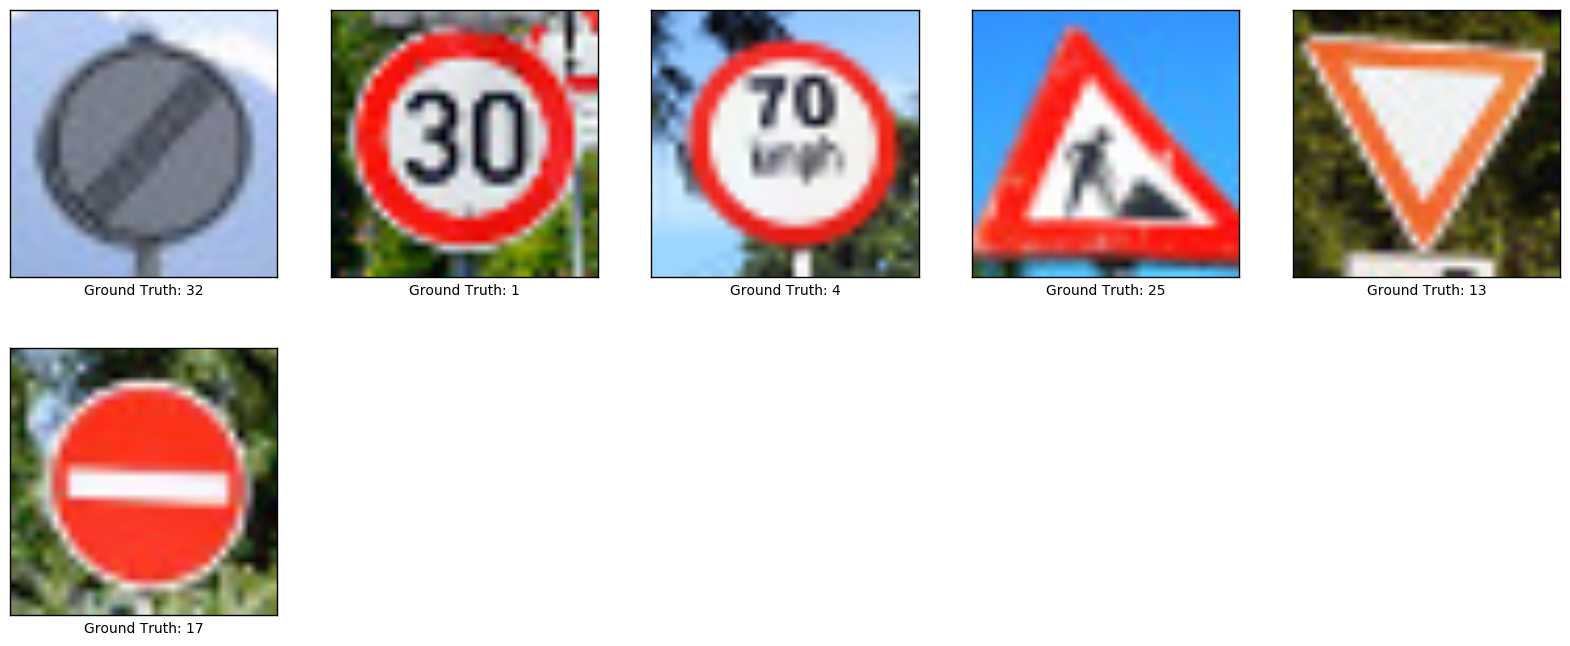

In [26]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
signs = []
signs.append(plt.imread('./signs/1.jpg'))
signs.append(plt.imread('./signs/2.jpg'))
signs.append(plt.imread('./signs/3.jpg'))
signs.append(plt.imread('./signs/4.jpg'))
signs.append(plt.imread('./signs/6.jpg'))
signs.append(plt.imread('./signs/7.jpg'))

label_train = [32,1,4, 25,13,17]


fig = plt.figure(figsize=(20, 8))


for ind in range(len(signs)):
    img = fig.add_subplot(2,5,ind+1)
    plt.imshow(signs[ind])
    #Add corresponding label
    img.set_xlabel("Ground Truth: {0}".format(label_train[ind]))
    #Remove the axis ticks
    img.set_xticks([])
    img.set_yticks([])

plt.show()    
    
signs_train = preprocesing(signs)
label_train = array2classifier(43, label_train)


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**
1. Darkness
2. Different angles
3. Overlapping 

In [90]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
prediction=tf.argmax(fc2,1)
p = prediction.eval(feed_dict={x: signs_train}, session=sess)
print(p)

[32  1 28 25 13 17]


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**
Yes, my model result for my pictures is equal to train dataset result.</br> 
New images:<br/>
Correct result: 5<br/>
Incorrect result: 1<br/>
Accuracy: 5/6 = 0.83<br/>
Test accuracy: 0.905<br/>
<br/>
I think if I get more images, accuracy will be close to 0.905 value.

In [91]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
prediction = tf.nn.softmax(fc2)
topFive=tf.nn.top_k(fc2, k=5, sorted=True, name=None)
topFive = sess.run([topFive], feed_dict={x: signs_train, y: label_train})
print(topFive)


[TopKV2(values=array([[ 11.87631893,   7.4164257 ,   2.48055029,   1.71583652,
          0.48663107],
       [ 30.34165573,  19.08275223,   8.58989525,   5.25060129,
          1.50518107],
       [ 12.60631657,   7.1945591 ,   3.25667953,   2.69158435,
          1.50056529],
       [ 40.20679855,  24.4569664 ,  15.83211327,  12.59252357,
         11.11907864],
       [ 33.36592484,  13.44553566,   8.87501812,   8.86927319,
          5.29921389],
       [ 50.79405594,  16.80987167,   6.90996742,   3.44728231,
          1.42659807]], dtype=float32), indices=array([[32,  6, 41,  3, 12],
       [ 1,  0,  2,  4, 11],
       [28, 29, 41, 12,  7],
       [25, 29, 23, 38, 36],
       [13, 15, 35,  1,  3],
       [17, 14, 38,  9, 34]], dtype=int32))]


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**
Sure prediction is for signs 4(40%) and 6 (50%). Sign 4 (road work) has a plain background, sign 6 (no entry) is the simplest for recognition.  Uncertain prediction for sign 3 - 12%. What interesting - there are no correct predictions for k=5. I think we need to use 25% as a minimum for certain prediction. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.